In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 1000)

### Load Data

In [3]:
data_dir = '..\data\\'
cvadr = pd.read_pickle(data_dir + 'final_dataset.pkl')
cvadr.head(2)

,DRUG_NAME,MASS,ATC_LEVEL_2,ATC_VECTOR,TARGETS,TARGET_VECTOR,REPORT_NO,DATE_RECEIVED,REPORT_TYPE,GENDER,AGE,SERIOUS_FLAG,REPORTER_TYPE,SOURCE,WEIGHT_KG,ADMIN_ROUTE,DOSAGE_FORM,CONCOMITANT_DRUGS,REACTION,SOC,SIDER
0,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,Not Serious,Pharmacist,MAH,NaN,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,International normalised ratio increased,Investigations,False
1,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,Not Serious,Pharmacist,MAH,NaN,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,Drug ineffective,General disorders and administration site cond...,False


In [4]:
cvadr_original = cvadr.copy()

In [5]:
cvadr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776287 entries, 0 to 1323890
Data columns (total 21 columns):
DRUG_NAME            776287 non-null object
MASS                 776287 non-null float64
ATC_LEVEL_2          776287 non-null object
ATC_VECTOR           776287 non-null object
TARGETS              776287 non-null object
TARGET_VECTOR        776287 non-null object
REPORT_NO            776287 non-null object
DATE_RECEIVED        776287 non-null datetime64[ns]
REPORT_TYPE          776249 non-null object
GENDER               764767 non-null object
AGE                  776287 non-null float64
SERIOUS_FLAG         776287 non-null object
REPORTER_TYPE        610204 non-null object
SOURCE               755595 non-null object
WEIGHT_KG            272427 non-null float64
ADMIN_ROUTE          743684 non-null object
DOSAGE_FORM          754575 non-null object
CONCOMITANT_DRUGS    776287 non-null float64
REACTION             776287 non-null object
SOC                  776287 non-null obj

In [6]:
# name first row as primary key
cvadr = cvadr.reset_index()
cvadr = cvadr.rename(columns={'index': 'ROW_ID'})
cvadr.head(2)

,ROW_ID,DRUG_NAME,MASS,ATC_LEVEL_2,ATC_VECTOR,TARGETS,TARGET_VECTOR,REPORT_NO,DATE_RECEIVED,REPORT_TYPE,GENDER,AGE,SERIOUS_FLAG,REPORTER_TYPE,SOURCE,WEIGHT_KG,ADMIN_ROUTE,DOSAGE_FORM,CONCOMITANT_DRUGS,REACTION,SOC,SIDER
0,0,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,Not Serious,Pharmacist,MAH,NaN,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,International normalised ratio increased,Investigations,False
1,1,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,Not Serious,Pharmacist,MAH,NaN,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,Drug ineffective,General disorders and administration site cond...,False


In [7]:
# change DATE_RECEIVED to datetime tpye
cvadr['DATE_RECEIVED'] = pd.to_datetime(cvadr['DATE_RECEIVED'] , yearfirst=True)

# fix dates in the future (these were converted to the wrong century)
cvadr['DATE_RECEIVED'] = cvadr['DATE_RECEIVED'].apply(lambda x: x if x.year < 2020 else x - pd.DateOffset(years=100))

# change categorical columsn to category data type

categorical_cols = ['REPORT_TYPE','GENDER','REPORTER_TYPE','SOURCE','ADMIN_ROUTE','DOSAGE_FORM', 'SERIOUS_FLAG']
cvadr[categorical_cols] = cvadr[categorical_cols].astype('category')

### Descriptive Stats

In [8]:
# add string type helper columns
cvadr[['str_ATC_LEVEL_2','str_TARGETS']] = cvadr[['ATC_LEVEL_2','TARGETS']].astype('str')

cvadr_helper = cvadr[['ROW_ID', 'DRUG_NAME', 'MASS', 'REPORT_NO', 'DATE_RECEIVED',
       'REPORT_TYPE', 'GENDER', 'AGE', 'SERIOUS_FLAG', 'REPORTER_TYPE',
       'SOURCE', 'WEIGHT_KG', 'ADMIN_ROUTE', 'DOSAGE_FORM',
       'CONCOMITANT_DRUGS', 'REACTION', 'SOC', 'SIDER', 'str_ATC_LEVEL_2',
       'str_TARGETS']]

In [9]:
# count
# distinct count
# null count
# min/max


count = cvadr_helper.count()
dcount = cvadr_helper.nunique()
ncount = cvadr_helper.isna().sum()
dtypes = cvadr_helper.dtypes


In [10]:
desc_stats = pd.concat([count, ncount, dcount, dtypes], axis=1)
desc_stats.columns = ['count', 'empty', 'unique count', 'data type']
desc_stats['empty_%'] = desc_stats['empty']/cvadr.ROW_ID.count()*100

desc_stats.style.format({'empty_%': '{:,.2f}%'})

,count,empty,unique count,data type,empty_%
ROW_ID,776287,0,776287,int64,0.00%
DRUG_NAME,776287,0,1088,object,0.00%
MASS,776287,0,1024,float64,0.00%
REPORT_NO,776287,0,207775,object,0.00%
DATE_RECEIVED,776287,0,12727,datetime64[ns],0.00%
REPORT_TYPE,776249,38,7,category,0.00%
GENDER,764767,11520,2,category,1.48%
AGE,776287,0,480,float64,0.00%
SERIOUS_FLAG,776287,0,2,category,0.00%
REPORTER_TYPE,610204,166083,6,category,21.39%


In [11]:
desc_stats.to_csv(data_dir + 'desc_stats.csv')

In [12]:
desc_stats_numeric = cvadr.describe().round()
desc_stats_numeric.to_csv(data_dir + 'desc_stats_numeric.csv')
desc_stats_numeric

,ROW_ID,MASS,AGE,WEIGHT_KG,CONCOMITANT_DRUGS
count,776287.0,776287.0,776287.0,272427.0,776287.0
mean,666888.0,368.0,51.0,69.0,2.0
std,401348.0,227.0,22.0,24.0,3.0
min,0.0,30.0,-62.0,0.0,0.0
25%,311304.0,253.0,34.0,57.0,0.0
50%,652363.0,312.0,53.0,68.0,1.0
75%,1019466.0,401.0,68.0,82.0,3.0
max,1323890.0,5006.0,119.0,772.0,108.0


In [13]:
cvadr.isna().sum()


ROW_ID                    0
DRUG_NAME                 0
MASS                      0
ATC_LEVEL_2               0
ATC_VECTOR                0
TARGETS                   0
TARGET_VECTOR             0
REPORT_NO                 0
DATE_RECEIVED             0
REPORT_TYPE              38
GENDER                11520
AGE                       0
SERIOUS_FLAG              0
REPORTER_TYPE        166083
SOURCE                20692
WEIGHT_KG            503860
ADMIN_ROUTE           32603
DOSAGE_FORM           21712
CONCOMITANT_DRUGS         0
REACTION                  0
SOC                       0
SIDER                     0
str_ATC_LEVEL_2           0
str_TARGETS               0
dtype: int64

### Handle Blanks

In [14]:
nan_col_a = ['REPORT_TYPE','GENDER','REPORTER_TYPE','SOURCE','ADMIN_ROUTE','DOSAGE_FORM']
nan_col_b = ['WEIGHT_KG']

# create unknown category for categorical columns
for i in nan_col_a:
    if('Unknown' not in cvadr[i].cat.categories):
        cvadr[i] = cvadr[i].cat.add_categories('Unknown')
        
cvadr[nan_col_a] = cvadr[nan_col_a].fillna('Unknown')

# WEIGHT_KH is the only numeric column with blanks.
# Remove column because more than half are blankd (65% empty).

cvadr = cvadr[['ROW_ID', 'DRUG_NAME', 'MASS', 'ATC_LEVEL_2', 'ATC_VECTOR',
       'TARGETS', 'TARGET_VECTOR', 'REPORT_NO', 'DATE_RECEIVED',
       'REPORT_TYPE', 'GENDER', 'AGE', 'SERIOUS_FLAG', 'REPORTER_TYPE',
       'SOURCE', 'ADMIN_ROUTE', 'DOSAGE_FORM',
       'CONCOMITANT_DRUGS', 'REACTION', 'SOC', 'SIDER']]

### Univariate Plots

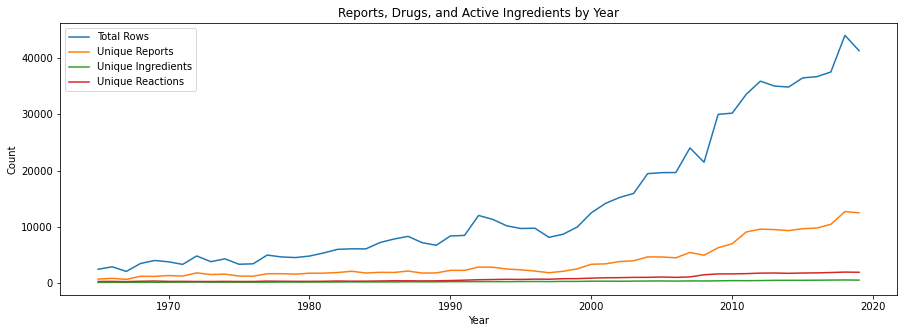

In [15]:
# count distinct reorts, drugs, and SE per year

counts_by_year = cvadr.groupby(cvadr['DATE_RECEIVED'].dt.year)['ROW_ID','REPORT_NO','DRUG_NAME','REACTION'].nunique()
counts_by_year = counts_by_year.reset_index()

#counts_by_year['DATE_RECEIVED'] = counts_by_year['DATE_RECEIVED'].apply(lambda x: x if x < 2020 else x-100)
counts_by_year.head()

# melt for plotting
counts_by_year_melt = counts_by_year.melt(id_vars='DATE_RECEIVED', value_vars=['ROW_ID','REPORT_NO','DRUG_NAME','REACTION'], var_name='VAR', value_name='COUNT')

fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x='DATE_RECEIVED', y='COUNT', data=counts_by_year_melt, hue='VAR', ax=ax)

plot1 = plt.xlabel('Year')
plot1 = plt.ylabel('Count')
plot1 = plt.title("Reports, Drugs, and Active Ingredients by Year")

plot1_labels = ax.get_legend_handles_labels()[0][1:5]
ax.legend(plot1_labels, ['Total Rows', 'Unique Reports','Unique Ingredients','Unique Reactions'])

plt.show()

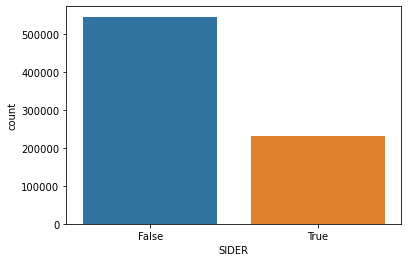

In [16]:
# count the target variable
ax = sns.countplot(x='SIDER', data=cvadr)

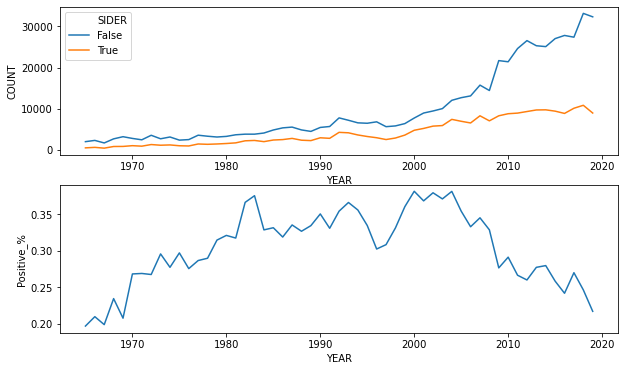

In [17]:
# time series plot wtih color for outcomes
# count distinct reorts, drugs, and SE per year

outcomes_by_year = cvadr.groupby([cvadr['DATE_RECEIVED'].dt.year, 'SIDER'])['ROW_ID'].count()
outcomes_by_year = outcomes_by_year.reset_index()
outcomes_by_year.columns = ['YEAR', 'SIDER', 'COUNT']
outcomes_by_year_1 = outcomes_by_year.pivot(index='YEAR', columns='SIDER', values='COUNT').reset_index()
outcomes_by_year_1['Positive_%'] = outcomes_by_year_1[True]/(outcomes_by_year_1[False] + outcomes_by_year_1[True])


# melt for plotting
outcomes_by_year_melt = outcomes_by_year.melt(id_vars='YEAR', value_vars='COUNT', var_name='SIDER', value_name='COUNT')

fig, ax = plt.subplots(2,1, figsize=(10,6))

sns.lineplot(x='YEAR', y='COUNT', data=outcomes_by_year, hue='SIDER', ax=ax[0])
sns.lineplot(x='YEAR', y='Positive_%', data=outcomes_by_year_1, ax=ax[1])


plt.show()

# The count of reported reactions increases over time
# Looks like the number of true signals deacreases in more recent year. 
# Consider running models with different time periods of data. 

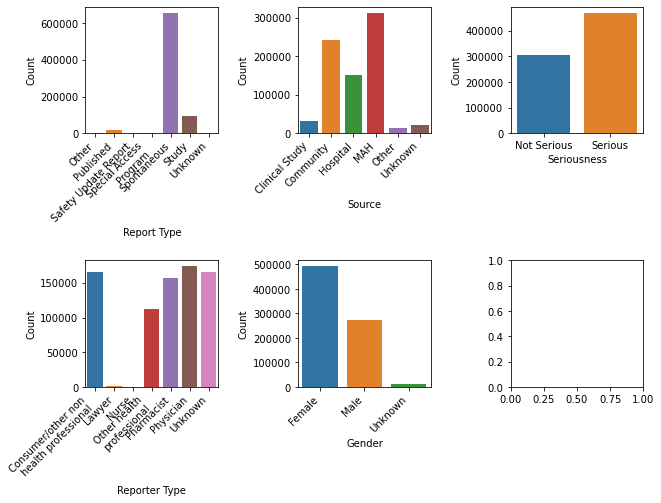

In [18]:
# plot categorical columns

import textwrap

fig, ax = plt.subplots(2,3, figsize=(10,7), sharex=False)
plt.subplots_adjust(hspace=1, wspace=.6)

plot3 = sns.countplot(x='REPORT_TYPE', data=cvadr, ax=ax[0,0])
plot3.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot3.get_xticklabels())], rotation=45, horizontalalignment='right')
ax[0,0].set_xlabel('Report Type')
ax[0,0].set_ylabel('Count')

plot4 = sns.countplot(x='REPORTER_TYPE', data=cvadr, ax=ax[1,0])
plot4.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot4.get_xticklabels())], rotation=45, horizontalalignment='right')
ax[1,0].set_xlabel('Reporter Type')
ax[1,0].set_ylabel('Count')

plot5 = sns.countplot(x='SOURCE', data=cvadr, ax=ax[0,1])
plot5.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot5.get_xticklabels())], rotation=45, horizontalalignment='right')
ax[0,1].set_xlabel('Source')
ax[0,1].set_ylabel('Count')

plot6 = sns.countplot(x='GENDER', data=cvadr, ax=ax[1,1])
plot6.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot6.get_xticklabels())], rotation=45, horizontalalignment='right')
ax[1,1].set_xlabel('Gender')
ax[1,1].set_ylabel('Count')

plot7 = sns.countplot(x='SERIOUS_FLAG', data=cvadr, ax=ax[0,2])
ax[0,2].set_xlabel('Seriousness')
ax[0,2].set_ylabel('Count')


# Show plot
plt.show()

In [19]:
y = cvadr[['ROW_ID','REACTION','SOC']]
x = y.groupby('REACTION')['ROW_ID'].count().reset_index()
x.columns = ['REACTION', 'ROW_COUNT']
z = x.merge(y, how='left', on='REACTION')[['REACTION','SOC','ROW_COUNT']]
z = z.drop_duplicates()

soc_list = list(z.SOC.unique())
color_range = list(np.linspace(0, 1, len(soc_list), endpoint=False))
colors = [plt.cm.tab20b(x) for x in color_range]
color_dict = dict(zip(soc_list, colors))
color_dict
color_df = pd.DataFrame.from_dict(color_dict, orient='Index', columns=['r','g', 'b', 'a']).reset_index()
color_df['rgba'] = list(zip(color_df['r'], color_df['g'], color_df['b'], color_df['a']))
color_df = color_df[['index','rgba']]
color_df.columns = ['SOC','RGBA']

# limit to top 50
z = z.merge(color_df).sort_values(by='ROW_COUNT', ascending=False).head(50)


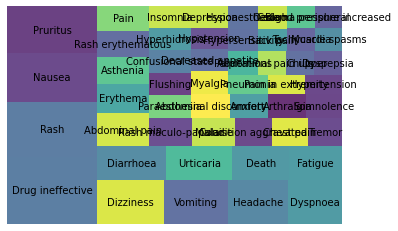

In [20]:
# libraries

import squarify    # pip install squarify (algorithm for treemap)

#norm = matplotlib.colors.Normalize(vmin=min(dataAssists.A), vmax=max(dataAssists.A))
#colors = [matplotlib.cm.Blues(norm(value)) for value in dataAssists.A]

#= pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
squarify.plot(sizes=z['ROW_COUNT'], label=z['REACTION'], alpha=.8 )
plt.axis('off')
plt.show()


In [21]:
# tree plot of atc category
# T/F for colour




In [22]:
# tree plot for targets
# T/F for colour




In [23]:
cvadr.head()

,ROW_ID,DRUG_NAME,MASS,ATC_LEVEL_2,ATC_VECTOR,TARGETS,TARGET_VECTOR,REPORT_NO,DATE_RECEIVED,REPORT_TYPE,GENDER,AGE,SERIOUS_FLAG,REPORTER_TYPE,SOURCE,ADMIN_ROUTE,DOSAGE_FORM,CONCOMITANT_DRUGS,REACTION,SOC,SIDER
0,0,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,Not Serious,Pharmacist,MAH,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,International normalised ratio increased,Investigations,False
1,1,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,Not Serious,Pharmacist,MAH,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,Drug ineffective,General disorders and administration site cond...,False
2,2,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",226246,2007-12-07,Spontaneous,Male,76.0,Not Serious,Other health professional,MAH,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,1.0,Drug ineffective,General disorders and administration site cond...,False
3,3,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",429337,2012-04-13,Spontaneous,Male,44.0,Serious,Physician,MAH,Unknown,POWDER FOR SOLUTION INTRAVENOUS,2.0,Electrocardiogram ST segment elevation,Investigations,False
4,4,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",429337,2012-04-13,Spontaneous,Male,44.0,Serious,Physician,MAH,Unknown,POWDER FOR SOLUTION INTRAVENOUS,2.0,Atrioventricular block complete,Cardiac disorders,False


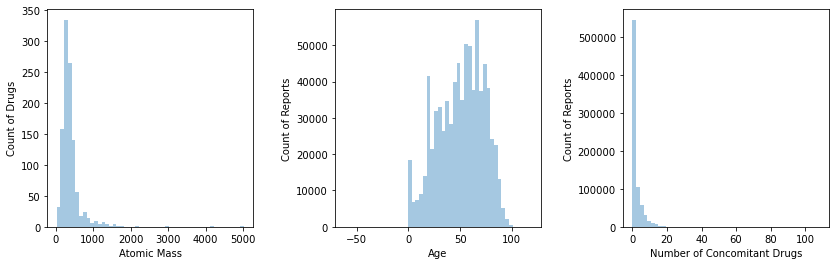

In [24]:
#  PLot distributions of numeric columns

fig, ax = plt.subplots(1,3, figsize=(14,4), sharex=False)
plt.subplots_adjust(hspace=.6, wspace=.4)


# Plot the distribution of average atomic mass

x = cvadr.drop_duplicates('DRUG_NAME')['MASS']
plot1 = sns.distplot(x, kde=False,  ax=ax[0])
ax[0].set(xlabel='Atomic Mass', ylabel='Count of Drugs')

# age
plot2 = sns.distplot(cvadr['AGE'], ax=ax[1], kde=False)
ax[1].set(xlabel='Age', ylabel='Count of Reports')

# concomitant drugs
plot4 = sns.distplot(cvadr['CONCOMITANT_DRUGS'], kde=False, ax=ax[2])
ax[2].set(xlabel='Number of Concomitant Drugs', ylabel='Count of Reports')

plt.show()

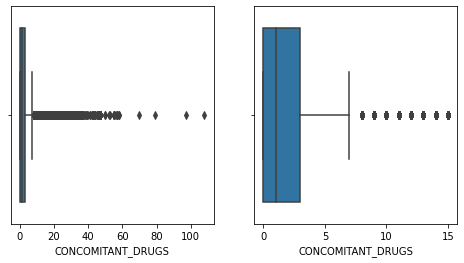

before: (770080,)
after: (776287,)


In [25]:
# remove outliers from concomitant drugs column.
# it doesn't make sense to have more than a dozen or so concomitant drugs.
# exclude observations greater than 4 standard deviations from the mean (0.1% of observations)

from scipy import stats
x = cvadr['CONCOMITANT_DRUGS'].copy()
z = np.abs(stats.zscore(x))
threshold = 4
y = x[(z < threshold)]

fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.boxplot(x, ax=ax[0])
sns.boxplot(y, ax=ax[1])

plt.show()

print('before:', y.shape)
print('after:', x.shape)

# remove outlier observations
cvadr = cvadr.merge(y, left_index=True, right_index=True, how='inner', copy=False)
cvadr['CONCOMITANT_DRUGS'] = cvadr['CONCOMITANT_DRUGS_x']
cvadr = cvadr.drop(['CONCOMITANT_DRUGS_x','CONCOMITANT_DRUGS_y'], axis=1)

rows before: (770080, 21)
rows after: (770066, 21)


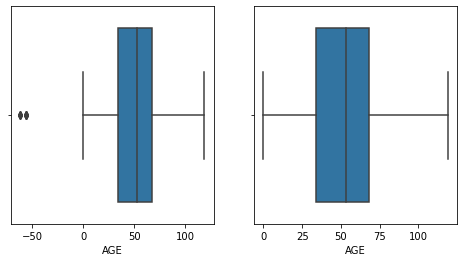

In [26]:
# remove outliers from Age column

x = cvadr['AGE'].copy()

print('rows before:', cvadr.shape)

# remove observations with negative age
cvadr = cvadr[cvadr['AGE']>= 0]

# remove observations with age over 122. This is the oldest recorded age. 
cvadr = cvadr[cvadr['AGE'] <= 122]

print('rows after:', cvadr.shape)

# plot it
fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.boxplot(x, ax=ax[0])
sns.boxplot(cvadr['AGE'], ax=ax[1])


In [27]:
# Checked the drug wtih the higest atomic mass
# Verified that atomic mass is actaully 5135.86 g/mol g·mol−1

cvadr.sort_values(by='MASS', ascending=False).head(1)

,ROW_ID,DRUG_NAME,MASS,ATC_LEVEL_2,ATC_VECTOR,TARGETS,TARGET_VECTOR,REPORT_NO,DATE_RECEIVED,REPORT_TYPE,GENDER,AGE,SERIOUS_FLAG,REPORTER_TYPE,SOURCE,ADMIN_ROUTE,DOSAGE_FORM,REACTION,SOC,SIDER,CONCOMITANT_DRUGS
735216,1278461,TESAMORELIN,5005.76,{'ANTERIOR PITUITARY LOBE HORMONES AND ANALOGU...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Growth hormone-releasing hormone receptor': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",721449,2018-12-12,Study,Male,62.0,Not Serious,Consumer/other non health professional,MAH,Subcutaneous,KIT,Drug ineffective,General disorders and administration site cond...,False,0.0


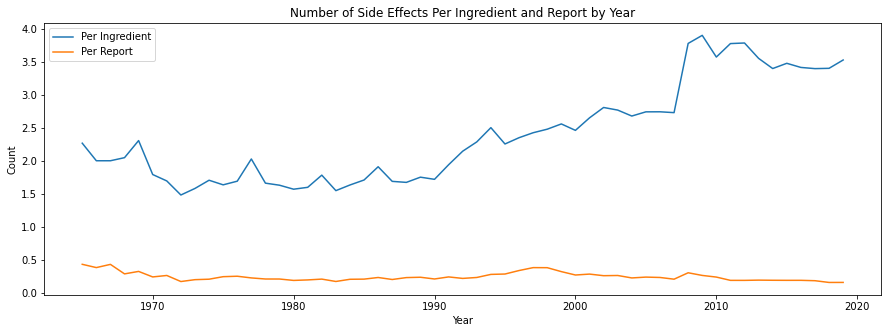

In [28]:
# Plot number of S/E per report and per active ingredients to check if data has been consistent

se_ratio = pd.concat([counts_by_year['DATE_RECEIVED'], counts_by_year['REACTION']/counts_by_year['DRUG_NAME'], counts_by_year['REACTION']/counts_by_year['REPORT_NO']], axis=1)

se_ratio.columns = ['YEAR', 'REACTIONS_PER_INGR', 'REACTIONS_PER_REPORT']

se_ratio.head()

# melt for plotting
se_ratio_melt = se_ratio.melt(id_vars='YEAR', value_vars=['REACTIONS_PER_INGR', 'REACTIONS_PER_REPORT'], var_name='VAR', value_name='COUNT')

fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x='YEAR', y='COUNT', data=se_ratio_melt, hue='VAR', ax=ax)

plot2 = plt.xlabel('Year')
plot2 = plt.ylabel('Count')
plot2 = plt.title("Number of Side Effects Per Ingredient and Report by Year")

plot1_labels = ax.get_legend_handles_labels()[0][1:3]
ax.legend(plot1_labels, ['Per Ingredient','Per Report'])

# fig.autofmt_xdate()

plt.show()

### Bivariate plots

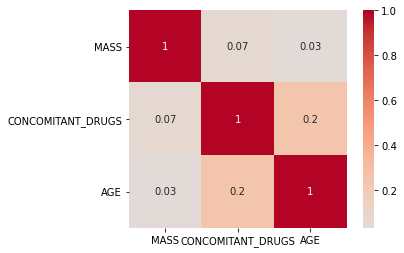

In [29]:
# There doesn't appear to beecorrelation between the numeric variables

matrix = np.triu(cvadr[['MASS', 'CONCOMITANT_DRUGS', 'AGE']].corr())

sns.heatmap(cvadr[['MASS', 'CONCOMITANT_DRUGS', 'AGE']].corr(), annot = True, fmt='.1g', center= 0, cmap= 'coolwarm',square=True)



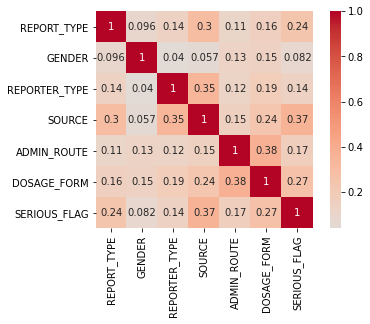

In [30]:
# There doesn't appear to be correlation between the categorical variables

cvadr_categorical = cvadr[categorical_cols]

import scipy.stats as ss

def cramers_v(x,y ):
    ## Source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
    ## Author: Shaked Zychlinski
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

sns.heatmap(cvadr_categorical.apply(lambda x: cvadr_categorical.apply(lambda y: cramers_v(x, y))),annot = True, center= 0, cmap= 'coolwarm', square=True)

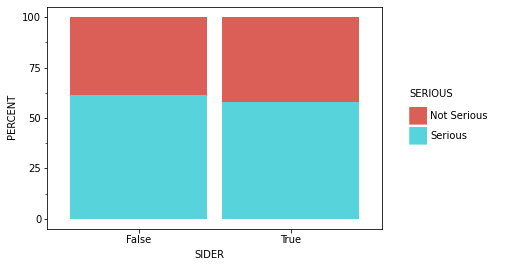

<ggplot: (-9223371919396402844)>

In [31]:
# seriousness bar chart

x = cvadr.groupby(['SIDER', 'SERIOUS_FLAG'])['ROW_ID'].count()
y = x.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
y = y.reset_index()
y.columns = ['SIDER', 'SERIOUS', 'PERCENT']

(ggplot(y, aes(x='SIDER', y='PERCENT', fill='SERIOUS'))
 + geom_col()
 + theme('seaborn')
)

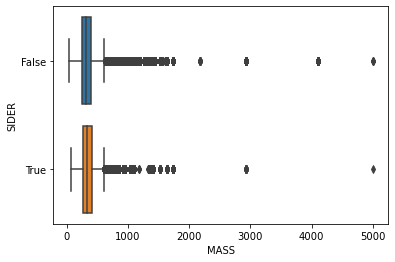

In [32]:
# box and whisker plot for mass


sns.boxplot(x='MASS', y='SIDER', data=cvadr, orient='h')
plt.show()

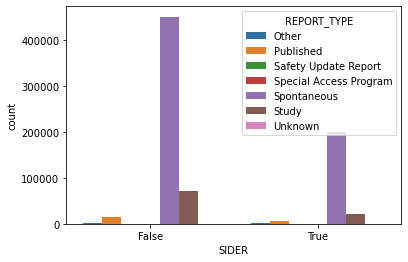

In [33]:
# report type

sns.countplot(x='SIDER', hue='REPORT_TYPE', data=cvadr)
plt.show()

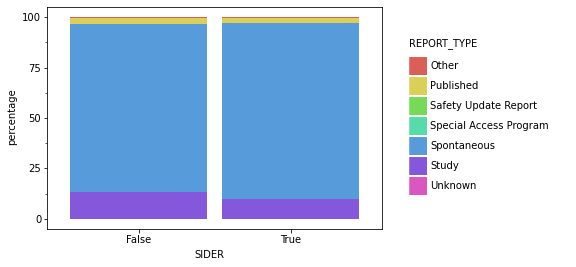

<ggplot: (-9223371919396152144)>

In [34]:
x = cvadr.groupby(['SIDER'])['REPORT_TYPE']
y = pd.concat([x.value_counts(), x.value_counts(normalize=True).mul(100)], keys=('counts','percentage'), axis=1)
z = y.reset_index()

(ggplot(z, aes(x='SIDER', y='percentage', fill='REPORT_TYPE'))
 + geom_col()
 + theme('seaborn')
)


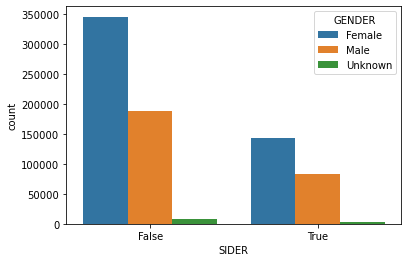

In [35]:
# scatter plot/box and whisker plot for gender

sns.countplot(x='SIDER', hue='GENDER', data=cvadr)
plt.show()

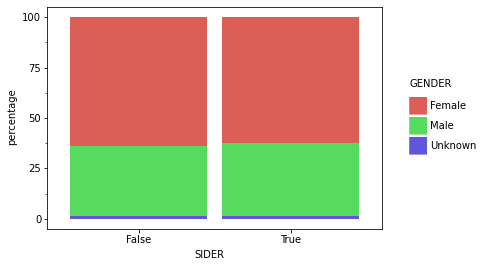

<ggplot: (-9223371919395885320)>

In [36]:
x = cvadr.groupby(['SIDER'])['GENDER']
y = pd.concat([x.value_counts(), x.value_counts(normalize=True).mul(100)], keys=('counts','percentage'), axis=1)
z = y.reset_index()
#m = z.melt(id_vars=['SIDER','GENDER'], value_vars=['counts', 'percentage'])

(ggplot(z, aes(x='SIDER', y='percentage', fill='GENDER'))
 + geom_col()
 + theme('seaborn')
)


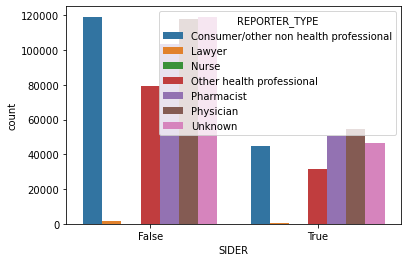

In [37]:
# scatter plot/box and whisker plot for reporter type

sns.countplot(x='SIDER', hue='REPORTER_TYPE', data=cvadr)
plt.show()

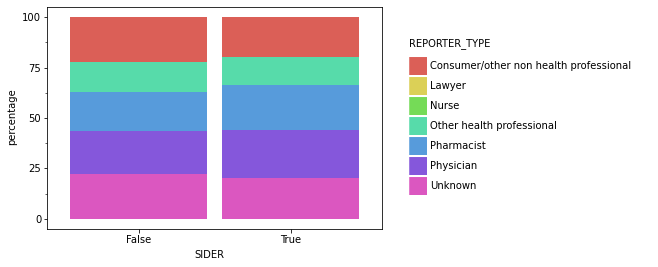

<ggplot: (-9223371919395788824)>

In [38]:
x = cvadr.groupby(['SIDER'])['REPORTER_TYPE']
y = pd.concat([x.value_counts(), x.value_counts(normalize=True).mul(100)], keys=('counts','percentage'), axis=1)
z = y.reset_index()

(ggplot(z, aes(x='SIDER', y='percentage', fill='REPORTER_TYPE'))
 + geom_col()
 + theme('seaborn')
)


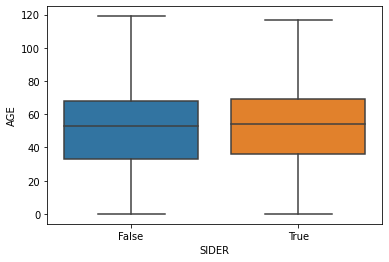

In [39]:
# scatter plot/box  for age with outcome as colour
x = cvadr[cvadr['AGE']>0]
# ax = sns.stripplot(x='SIDER', y='AGE', data=x, jitter=0.2)
ax = sns.boxplot(x='SIDER', y='AGE', data=x)

In [40]:
# reporter type: scatter plot with reporter type as colour; mosaic plot

In [41]:
# source: scatter plot with reporter type as colour; mosaic plot

In [42]:
# weight: box and whisker

In [43]:
# admin route: scatter plot with dosage as color

cvadr.ADMIN_ROUTE.unique().to_list()

['Intravenous (not otherwise specified)',
 'Unknown',
 'Intravenous drip',
 'Subcutaneous',
 'Parenteral',
 'Intramuscular',
 'Other',
 'Oral',
 'Sublingual',
 'Intra-nasal',
 'Intravenous bolus',
 'Transplacental',
 'Local infiltration',
 'Ophthalmic',
 'Intraocular',
 'Topical',
 'Transmammary',
 'Intraperitoneal',
 'Vaginal',
 'Buccal',
 'Intrathecal',
 'Feeding tube',
 'Intra-uterine',
 'Auricular (otic)',
 'Rectal',
 'Intradermal',
 'Inhalation',
 'Systemic',
 'Intrapleural',
 'Transdermal',
 'Epidural',
 'Endotracheal',
 'Intradiscal (Intraspinal)',
 'Subdural',
 'Intra-arterial',
 'Intra-articular',
 'Intratracheal',
 'Dental',
 'Intravesical',
 'Endosinusial',
 'Intra corpus cavernosum',
 'Urethral',
 'Cutaneous',
 'Occlusive dressing technique',
 'Oropharingeal',
 'Endocervical',
 'Intracervical',
 'Intracerebral',
 'Gastroenteral use',
 'Intra-amniotic',
 'Intracavernous',
 'Intracoronary',
 'Subdermal',
 'Irrigation',
 'Intracardiac',
 'Intrapericardial',
 'Hemodialysis']

In [44]:
pd.crosstab(cvadr.ADMIN_ROUTE, cvadr.DOSAGE_FORM)

DOSAGE_FORM,AEROSOL,AEROSOL (WITH PROPELLANTS),"AEROSOL, FOAM","AEROSOL, METERED DOSE",CAPSULE (IMMEDIATE AND DELAYED RELEASE),CAPSULE (IMMEDIATE AND EXTENDED RELEASE),"CAPSULE, DELAYED RELEASE","CAPSULE, DELAYED-RELEASE","CAPSULE, ENTERIC-COATED","CAPSULE, EXTENDED RELEASE","CAPSULE, IMMEDIATE RELEASE","CAPSULE, SUSTAINED-RELEASE","Capsule, soft",Capsules,Coated tablet,Cream,DISC (EXTENDED-RELEASE),DROPS NASAL,DROPS OPHTHALMIC,DROPS ORAL,DROPS OTIC,Drops,ELIXIR,EMULSION,Enema,Eye drops,"FILM, SOLUBLE",GEL,GRANULE FOR SOLUTION,GRANULE FOR SUSPENSION,"GRANULE FOR SUSPENSION, DELAYED RELEASE","GRANULES FOR SUSPENSION,EXTENDED RELEASE",GUM,Gas for inhalation,Granulate,IMPLANT,INHALATION,INSERT,INSERT (EXTENDED-RELEASE),Injection,KIT,LIPOSOMAL,LIQUID,LIQUID BLOCK/INFILTRATION,LIQUID DENTAL,LIQUID DIALYSIS,LIQUID EPIDURAL,LIQUID INHALATION,LIQUID INTRA-ARTERIAL,LIQUID INTRACAVITY,LIQUID INTRAMUSCULAR,LIQUID INTRAVENOUS,LIQUID IRRIGATION,LIQUID OPHTHALMIC,LIQUID ORAL,LIQUID OTIC,LIQUID SUBCUTANEOUS,LIQUID SUBLINGUAL,LIQUID TOPICAL,LOTION,LOZENGE,METERED-DOSE (AEROSOL),METERED-DOSE (PUMP),NOT SPECIFIED,OINTMENT OPHTHALMIC,OINTMENT RECTAL,OINTMENT TOPICAL,OINTMENT VAGINAL,OVULES,Ointment,Oral liquid,PACKAGE,PAD,PASTE,PATCH,"PATCH, EXTENDED RELEASE","PIECE, CHEWABLE",PLACEBO,PLASTER,POWDER FOR SOLUTION INHALATION,POWDER FOR SOLUTION INTRA-ARTERIAL,POWDER FOR SOLUTION INTRA-ARTICULAR,POWDER FOR SOLUTION INTRACAVERNOSAL,POWDER FOR SOLUTION INTRAMUSCULAR,POWDER FOR SOLUTION INTRATHECAL,POWDER FOR SOLUTION INTRAVENOUS,POWDER FOR SOLUTION INTRAVESICULAR,POWDER FOR SOLUTION ORAL,POWDER FOR SOLUTION PARENTERAL (UNSPECIFIED),POWDER FOR SOLUTION SUBCUTANEOUS,POWDER FOR SOLUTION TOPICAL,POWDER FOR SUSPENSION INTRAVENOUS,POWDER FOR SUSPENSION ORAL,POWDER FOR SUSPENSION SUBCUTANEOUS,"POWDER FOR SUSPENSION, SUSTAINED-RELEASE","POWDER, EXTENDED RELEASE","POWDER, METERED DOSE",Pill,Powder,RING (SLOW-RELEASE),SOLUTION (EXTENDED RELEASE),SOLUTION (LONG-ACTING),SOLUTION BLOCK/INFILTRATION,SOLUTION DENTAL,SOLUTION DIALYSIS,SOLUTION DISINFECTANT(HOSPITAL/HC FACILITIES),SOLUTION EPIDURAL,SOLUTION INHALATION,SOLUTION INTRA-AMNIOTIC,SOLUTION INTRA-ARTERIAL,SOLUTION INTRADERMAL,SOLUTION INTRAMUSCULAR,SOLUTION INTRAOCULAR,SOLUTION INTRAPERITONEAL,SOLUTION INTRASPINAL,SOLUTION INTRATHECAL,SOLUTION INTRAVENOUS,SOLUTION IRRIGATION,SOLUTION NASAL,SOLUTION OPHTHALMIC,SOLUTION ORAL,SOLUTION OTIC,SOLUTION PARENTERAL (UNSPECIFIED),SOLUTION SUBCUTANEOUS,SOLUTION TOPICAL,SOLUTION TOPICAL (HOSPITAL/HC FACILITIES,"SPRAY, METERED DOSE",SUSPENSION (EXTENDED-RELEASE),SUSPENSION INHALATION,SUSPENSION INTRA-ARTICULAR,SUSPENSION INTRAMUSCULAR,SUSPENSION INTRAVENOUS,SUSPENSION NASAL,SUSPENSION OPHTHALMIC,SUSPENSION ORAL,SUSPENSION OTIC,SUSPENSION RECTAL,SUSPENSION SUBCUTANEOUS,SWAB,Shampoo,Solution,Spray (not inhalation),Suppository,Suspension,Syrup,TABLET (CHEWABLE),TABLET (DELAYED AND EXTENDED RELEASE),TABLET (DELAYED AND IMMEDIATE RELEASE),TABLET (DELAYED-RELEASE),TABLET (EFFERVESCENT),TABLET (ENTERIC-COATED),TABLET (EXTENDED-RELEASE),TABLET (IMMEDIATE AND EXTENDED RELEASE),TABLET (IMMEDIATE RELEASE),TABLET (ORALLY DISINTEGRATING),TABLET (SLOW-RELEASE),TABLET FOR SUSPENSION,"TABLET, FILM COATED",TINCTURE,TOOTHPASTE,Tablets,"VAGINAL TABLET, EFFERVESCENT",Vaginal suppository,WAFER,Unknown
ADMIN_ROUTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Auricular (otic),0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,6,0,0,3,0,14,10,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,125,0,0,0,0,0,0,0,0,0,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,59,0,0,0,0,0,0,0,0,0,0,0,8,0,100,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0
Buccal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [45]:
# drop DOSAGE_FORM
# data is very messy, has too many levels, 
# and should be correlated with administration route anyway based on thier clinical definitions

print(cvadr.DOSAGE_FORM.unique().to_list())
cvadr = cvadr.drop('DOSAGE_FORM')

['POWDER FOR SOLUTION INTRAVENOUS', 'IMPLANT', 'TABLET (ORALLY DISINTEGRATING)', 'Unknown', 'POWDER FOR SOLUTION SUBCUTANEOUS', 'NOT SPECIFIED', 'LIQUID INTRAVENOUS', 'Capsules', 'EMULSION', 'SOLUTION ORAL', 'SOLUTION INTRAVENOUS', 'Powder', 'POWDER FOR SUSPENSION, SUSTAINED-RELEASE', 'Tablets', 'LIQUID ORAL', 'Injection', 'LIQUID INTRAMUSCULAR', 'Solution', 'TABLET (EXTENDED-RELEASE)', 'LIQUID', 'TABLET (CHEWABLE)', 'KIT', 'TABLET (SLOW-RELEASE)', 'GUM', 'PIECE, CHEWABLE', 'POWDER FOR SOLUTION ORAL', 'Capsule, soft', 'Oral liquid', 'TABLET, FILM COATED', 'CAPSULE, DELAYED-RELEASE', 'LIQUID DIALYSIS', 'TOOTHPASTE', 'LOZENGE', 'TABLET (EFFERVESCENT)', 'OINTMENT TOPICAL', 'ELIXIR', 'Syrup', 'SOLUTION INTRAPERITONEAL', 'SOLUTION IRRIGATION', 'LIQUID IRRIGATION', 'DROPS ORAL', 'Cream', 'SOLUTION INTRAMUSCULAR', 'Drops', 'Spray  (not inhalation)', 'METERED-DOSE (AEROSOL)', 'METERED-DOSE (PUMP)', 'SOLUTION INTRATHECAL', 'Ointment', 'LIQUID OPHTHALMIC', 'SUSPENSION OPHTHALMIC', 'POWDER FOR SU

KeyError: "['DOSAGE_FORM'] not found in axis"

In [ ]:
# concomitant drugs: scattter plot

### Feature Selection

In [46]:
cvadr.columns.values

array(['ROW_ID', 'DRUG_NAME', 'MASS', 'ATC_LEVEL_2', 'ATC_VECTOR',
       'TARGETS', 'TARGET_VECTOR', 'REPORT_NO', 'DATE_RECEIVED',
       'REPORT_TYPE', 'GENDER', 'AGE', 'SERIOUS_FLAG', 'REPORTER_TYPE',
       'SOURCE', 'ADMIN_ROUTE', 'DOSAGE_FORM', 'REACTION', 'SOC', 'SIDER',
       'CONCOMITANT_DRUGS'], dtype=object)

In [47]:
categorical_cols_min = ['REPORT_TYPE', 'GENDER', 'SERIOUS_FLAG', 'REPORTER_TYPE',
       'SOURCE', 'ADMIN_ROUTE', 'SOC'] # excluded targets and atc

numeric_cols = ['MASS', 'AGE', 'CONCOMITANT_DRUGS']

In [48]:
cvadr[categorical_cols_min].nunique()

REPORT_TYPE       7
GENDER            3
SERIOUS_FLAG      2
REPORTER_TYPE     7
SOURCE            6
ADMIN_ROUTE      57
SOC              27
dtype: int64

In [49]:
cvadr[categorical_cols_min].isna().sum()

REPORT_TYPE      0
GENDER           0
SERIOUS_FLAG     0
REPORTER_TYPE    0
SOURCE           0
ADMIN_ROUTE      0
SOC              0
dtype: int64

In [50]:
# encode ategorical variables

In [83]:
#!!! Only used last 5 years. FIX@!

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto')
categorical_arr = ohe.fit_transform(cvadr_last5[categorical_cols_min]).toarray()
categorical_labels = ohe.get_feature_names(categorical_cols_min)
# for putting the labels back on:
# feature_labels = np.array(feature_labels).ravel()
# features = pd.DataFrame(feature_arr, columns=feature_labels)

In [85]:
cvadr_last5[categorical_cols_min].shape

(157940, 7)

In [87]:
# use SelectKBest wtih Chi Square to calcualate a score for each  categorical feature. 
# Select the top features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = categorical_arr  #independent columns
y = cvadr_last5['SIDER']    #target column i.e price range

#apply SelectKBest class to extract top 50 best features
bestfeatures = SelectKBest(score_func=chi2, k=50)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_, index=categorical_labels, columns=['F score'])
#dfcolumns = pd.DataFrame(X.columns)
pvalues = pd.DataFrame(fit.pvalues_, index=categorical_labels, columns=['p value']).round(2)
dfscores =  pd.concat([dfscores, pvalues], axis=1)
dfscores.columns = ['f_score', 'p_value']
dfscores = dfscores.sort_values('f_score', ascending=False)

X_best = bestfeatures.fit_transform(X,y)
cat_best = pd.DataFrame(X_best)

In [88]:

cat_best.shape

(157940, 50)

In [89]:
# keep top 50 feature

dfscores.head(50)

,f_score,p_value
SOC_General disorders and administration site conditions,3158.875312,0.0
SOURCE_Community,2684.683439,0.0
ADMIN_ROUTE_Intra-uterine,2518.029917,0.0
SOC_Gastrointestinal disorders,1581.312708,0.0
SOURCE_Clinical Study,1576.473491,0.0
REPORT_TYPE_Study,1460.094822,0.0
REPORTER_TYPE_Unknown,1173.643651,0.0
REPORTER_TYPE_Pharmacist,999.322426,0.0
SOC_Blood and lymphatic system disorders,598.995541,0.0
"SOC_Injury, poisoning and procedural complications",585.396390,0.0


In [56]:
# Use SelectKBest with ANOVA (f_classif) to choose best numerical variables

from sklearn.feature_selection import f_classif

In [59]:
# Create an SelectKBest object to select features with two best ANOVA F-Values
bestFeatures = SelectKBest(f_classif, k='all')

# Apply the SelectKBest object to the features and target
fit = bestFeatures.fit(X, y)

dfscores = pd.DataFrame(fit.scores_, index=numeric_cols, columns=['F score'])
#dfcolumns = pd.DataFrame(X.columns)
pvalues = pd.DataFrame(fit.pvalues_, index=numeric_cols, columns=['p value']).round(2)
dfscores =  pd.concat([dfscores, pvalues], axis=1)
dfscores.columns = ['f_score', 'p_value']
dfscores = dfscores.sort_values('f_score', ascending=False)
dfscores

,f_score,p_value
AGE,953.896524,0.0
CONCOMITANT_DRUGS,845.015092,0.0
MASS,152.228295,0.0


## Modeling

In [60]:
# for testing purposes, keep only the the most recent year for now. 

cvadr_last5 = cvadr[cvadr['DATE_RECEIVED'].dt.year > 2015 ]
cvadr_last5.shape


(157940, 21)

## Numeric Variables Only

In [ ]:
# Convert dataframe to array

# target
y = np.array(cvadr_last5['SIDER']) 

# features
X = cvadr_last5[numeric_cols]

# Saving feature names for later use
#X_labels = list(X.columns)

# Convert to numpy array
X = np.array(X)

# split into training and testing sets

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# check the training and testing sets
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the classifier
rf.fit(X_train, y_train)



In [ ]:
# Print the name and gini importance of each feature
pd.DataFrame(zip(X_labels, rf.feature_importances_)).sort_values(by=1, ascending=False).head(20)

In [ ]:
# Use the forest's predict method on the test data
y_predict = rf.predict(X_test)

In [ ]:
# accuracy
accuracy_score(y_test, y_predict)

### Categorical Variables Only

In [79]:
cvadr_last5.shape

(157940, 21)

In [80]:
X.shape

(157940, 50)

In [92]:
# Convert dataframe to array

# target
y = np.array(cvadr_last5['SIDER']) 

# features
X = cat_best

# Saving feature names for later use
X_labels = list(X.columns)

# Convert to numpy array
X = np.array(X)

# split into training and testing sets

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# check the training and testing sets
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the classifier
rf.fit(X_train, y_train)


Training Features Shape: (118455, 50)
Training Labels Shape: (118455,)
Testing Features Shape: (39485, 50)
Testing Labels Shape: (39485,)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [93]:
# Print the name and gini importance of each feature
pd.DataFrame(zip(X_labels, rf.feature_importances_)).sort_values(by=1, ascending=False).head(20)

,0,1
33,33,0.089108
14,14,0.082731
4,4,0.058882
10,10,0.056976
32,32,0.045565
6,6,0.036948
19,19,0.033533
5,5,0.032207
27,27,0.031862
12,12,0.031624


In [94]:
# Use the forest's predict method on the test data
y_predict = rf.predict(X_test)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# accuracy
accuracy_score(y_test, y_predict)

0.768950234266177

###  ATC and Target Vectors

In [ ]:
from sklearn.feature_extraction import FeatureHasher
import sys

h = FeatureHasher(n_features=100)
D = cvadr_last5['ATC_LEVEL_2'].to_list()
f = h.transform(D)
atc_array = f.toarray()#.tolist()

h = FeatureHasher(n_features=100)
E = cvadr_last5['TARGETS'].to_list()
g = h.transform(D)

target_array = g.toarray()

array = np.concatenate([atc_array, target_array], axis=1)

In [ ]:
print(atc_array.shape)
print(target_array.shape)
print(array.shape)

In [ ]:
# Convert dataframe to array

# Labels are the values we want to predict
y = np.array(cvadr_last5['SIDER'])

# Remove the labels from the features
# axis 1 refers to the columns

#features= cvadr.drop('SIDER', axis = 1)

# try this first. Add in categorical min columns
#X = cvadr_last5[numeric_cols].merge(cvadr_cat_min, left_index=True, right_index=True, how='left') 
X = array

# Saving feature names for later use
#X_labels = list(X.columns)

# Convert to numpy array
#X = np.array(X)

In [ ]:
# split into training and testing sets

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# check the training and testing sets
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the classifier
rf.fit(X_train, y_train)

In [ ]:
# Print the name and gini importance of each feature
pd.DataFrame(zip(X_labels, rf.feature_importances_)).sort_values(by=1, ascending=False).head(20)

In [ ]:
# Use the forest's predict method on the test data
y_predict = rf.predict(X_test)

### Evaluate the Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# confusion matrix
confusion_matrix(y_test,y_predict)

In [ ]:
# F1 values
classification_report(y_test,y_predict)

In [ ]:
# accuracy
accuracy_score(y_test, y_predict)

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [ ]:
cm = confusion_matrix(y_test,y_predict)
plot_confusion_matrix(cm, classes = ['True','False'],
                      title = 'ADR Confusion Matrix')